## Import Data

In [17]:
import requests
import pandas as pd
import json

# Open the file in read mode
with open('api.txt', 'r') as file:
    content = file.read()


API_KEY = content

params = {
    "key": API_KEY,
    "appid": 440,
    "item": "Mann Co. Supply Crate Key",
    "quality": 6,
    "priceindex": 0
}

url = "https://backpack.tf/api/IGetPriceHistory/v1"

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()


## Get timestamps, values, and dates

In [19]:
from datetime import *

history = data.get("response", {}).get("history", {})

timestamps = []
readables = []
values = []
dateObjs = []
for i in range(0,len(history)):
   timestamp = (history[i]["timestamp"])
   value = (history[i]["value"])
   readable = datetime.fromtimestamp(timestamp,UTC).strftime('%Y-%m-%d %H:%M:%S UTC') if timestamp else "Unknown Date"
   dateObj = datetime.fromtimestamp(timestamp,UTC)
   timestamps.append(timestamp)
   readables.append(readable)
   values.append(value)
   dateObjs.append(dateObj)




## Create list of months
Ranges from the beginning of data to end of data

In [ ]:
dates = pd.date_range(start="2012-07-01", end="2025-02-01", freq="MS").tolist()  # 'MS' means Month Start

## Consolidate data monthly

In [21]:
# Remove timezone values for dateObjs from real data 
dateObjs = [dt.replace(tzinfo=None) for dt in dateObjs]

cleanList = []
for i in range(0,len(dates)- 1):
    feasible = []
    for j in range(0,len(dateObjs)):
        if dateObjs[j] > dates[i] and dateObjs[j] < dates[i+1]:
            feasible.append(values[j])
    cleanList.append(feasible)
        

In [22]:
import pandas as pd
test = pd.DataFrame({"dates": dates[0:len(dates) -1], "values" : cleanList})

avgList = []
for i in range(0,len(test)):
    avgList.append(pd.Series(test.loc[i,"values"]).mean())
    
test['avgVal'] = avgList

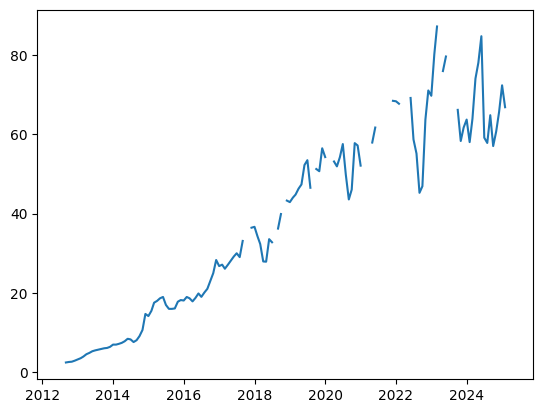

In [23]:
import matplotlib.pyplot as plt
plt.plot(test['dates'],test['avgVal'])

In [ ]:
test.to_csv("data/tf2Key.csv")